### Logarithm is data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("csv_files/statistics for ML/revenue.csv")
df

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jidal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


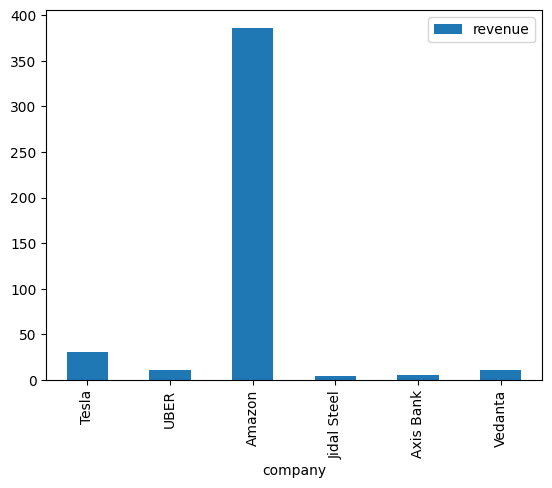

In [3]:
df.plot(x="company", y="revenue", kind="bar")
plt.show()

Notice that we useda bar chart to compare the revenue for different companies. But Amazon's bar is so high almost flattening the other bars line for Jidal Steel, making it hard to compare small bars as they almost look the same. To solve this we add a log function

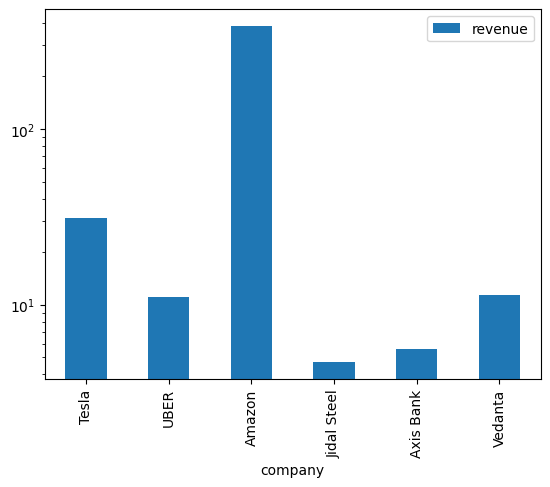

In [4]:
# add logy=True for better bar comparison
df.plot(x="company", y="revenue",kind="bar", logy=True)
plt.show()

## using log transform in machine learning
we want to predict if a load should be approved to a person

In [5]:
cdt = pd.read_csv("csv_files/statistics for ML/credit.csv")
cdt

,person name,credit score,income,age,load approved
0,Rob,750,80000,32,Y
1,Tom,310,32000,45,N
2,Xi,475,77000,33,Y
3,Mohan,600,65000,51,N
4,Pooja,820,550000,35,Y
5,Sofiya,780,75000,31,Y


In [6]:
# we want to predict if a load should be approved to a person basing on credit score, income and age	
# this is a standard supervised problem
# notice that Pooja's income is extremely high. If you are training a ML model, it will negatively affect its performance making it biased
# to solve this problem, create another column eg log income which will be a simple log of income column

## cosine similarity and cosine distance
Eg when comparing documents, such as number of times iphone and samsum are mentioned in a doc.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [8]:
# lets see the similarity btn 3:1 and 6:2
# note that this method expects a 2D array
# the similarity is 1 meaning the documents are very similar
cosine_similarity([[3,1]],[[6,2]])

array([[1.]])

In [9]:
# lets see the cosine distance btn 3:1 and 6:2
# note that this method expects a 2D array
# the similarity is close 0 meaning the documents are very similar
cosine_distances([[3,1]],[[6,2]])

array([[1.11022302e-16]])

In [10]:
# this also means the docs are similar
cosine_distances([[3,1]],[[2,2]])

array([[0.10557281]])

# lets create a dataframe of docs with different phone names

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame([
    {"iphone":3, "galaxy": 1},
    {"iphone":2, "galaxy": 0},
    {"iphone":1, "galaxy": 3},
    {"iphone":1, "galaxy": 2},
],
  index=[
      "doc1",
      "doc2",
      "doc3",
      "doc4"
  ]
 )
df

,iphone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [13]:
# now lets compare documents 1 and 2 using cosine_similarity
# notice that it has to be a 2D array
# we can say they are similar
cosine_similarity(df.loc["doc1":"doc1"], df.loc["doc2":"doc2"])

array([[0.9486833]])

In [14]:
# lets compare docs 1 and 3
# we can say the are not similar
cosine_similarity(df.loc["doc1":"doc1"], df.loc["doc3":"doc3"])

array([[0.6]])

In [15]:
# compare 3 and 4
# we can see they are similar
cosine_similarity(df.loc["doc3":"doc3"], df.loc["doc4":"doc4"])

array([[0.98994949]])

In [16]:
# lets do cosine_distance
# they are similar
# cosine_distances is 1-cosine_similarity
cosine_distances(df.loc["doc3":"doc3"], df.loc["doc4":"doc4"])

array([[0.01005051]])

# mean, mode, standard deviation

In [17]:
# mean == average
# mode == most frequently occuring value in a dataset
# std == how far apart the valus are from the mean

In [18]:
# consider the following data set with an outlier ie a data point that is very different from the rest of the data  pointsd
# Amazon's revenue is considered an outlier
rev = pd.read_csv("csv_files/statistics for ML/revenue.csv")
rev

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jidal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


In [19]:
rev["revenue"].mean()

74.93333333333334

In [20]:
# we can see that the values are very far apart from the mean value
rev["revenue"].std()

152.68864616161434

In [21]:
# see the basic startisics of the numbers
# but notice the percentiles
rev.describe()

,revenue
count,6.000000
mean,74.933333
std,152.688646
min,4.700000
25%,6.950000
50%,11.150000
75%,26.075000
max,386.000000


In [22]:
# simililar
# 75th percentile
rev.revenue.quantile(0.75)

26.075

In [23]:
rev["revenue"].quantile(0.75)

26.075

In [24]:
# let us remove the outlier
percentile_99  = rev.revenue.quantile(0.99)
percentile_99

368.25000000000006

In [25]:
no_outlier = rev[rev.revenue<=percentile_99]
no_outlier

,company,revenue
0,Tesla,31.0
1,UBER,11.0
3,Jidal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


In [26]:
rev

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jidal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


In [27]:
# lets say Axis Bank is missing revenue and i need to fill it
rev["revenue"][4] = np.NaN
rev

/tmp/ipykernel_40892/893007965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev["revenue"][4] = np.NaN


,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jidal Steel,4.7
4,Axis Bank,NaN
5,Vedanta,11.3


In [28]:
# now fill the null value with the median
# mean would be 88 making it a bad prediction
new_df = rev.fillna(rev.revenue.median())
new_df

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jidal Steel,4.7
4,Axis Bank,11.3
5,Vedanta,11.3


# Normal distribution
Here, we have most valus around the average value and other values far apart the average value

In [29]:
# we need seaborn to print the bell-like curve
import seaborn as sn

In [30]:
ht = pd.read_csv("csv_files/statistics for ML/height.csv")
ht.head(10)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,68.348516
8,Male,67.018950
9,Male,63.456494


<Axes: ylabel='Frequency'>

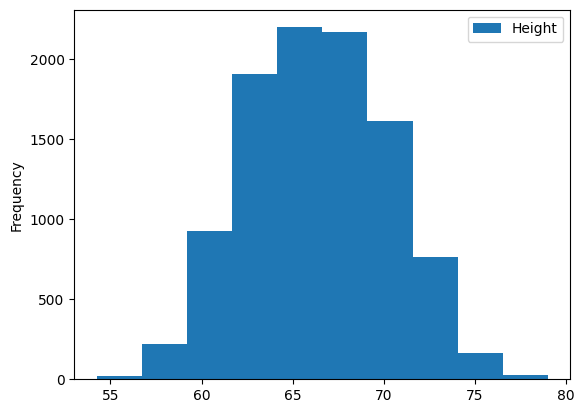

In [31]:
# looking at the above dataframe, Smith's height is an outliers
# we can either remove the outliers or try to transform them
ht.plot(x="Gender", y="Height", kind="hist")

In [32]:
# count means # of datapoints
ht.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Count'>

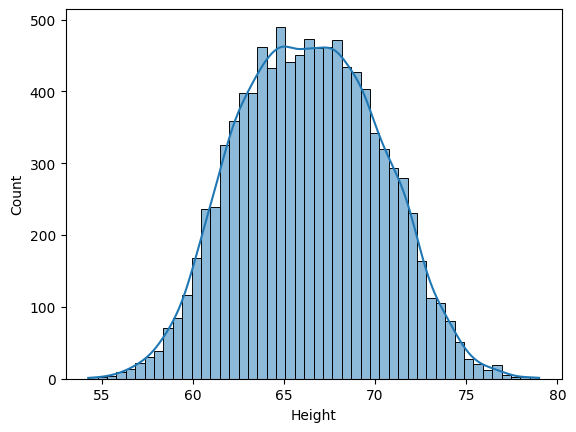

In [33]:
# we can use std to transform outliers
# first use seaborn to plot the bell curve and hist
# we can see that the data is normally distributed
sn.histplot(ht.Height, kde=True)

In [34]:
# the data has some outliers that we need to remove
# lets know the mean and std first
mean = ht.Height.mean()
mean

66.36755975482124

In [35]:
# standard deviation
std_dev = ht.Height.std()
std_dev

3.8475281207732293

In [36]:
# this means that most of the data in in the range of the mean ie 66.36755975482124
# we can use std to remove the outliers ie -3.84 and +3.84
mean - 3*std_dev

54.82497539250156

In [37]:
mean + 3*std_dev

77.91014411714093

In [38]:
# Now we can use these values as min and max to remove outliers
# we can see that 5 datapoints are above 77.91
ht[ht.Height>77.91]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [39]:
# we can see that 2 datapoints are below 54.82
ht[ht.Height<54.82]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [40]:
# Now lets combine these outliers
# this means that 7 data points are outliers
ht[(ht.Height<54.82) | (ht.Height > 77.91)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [41]:
# we can now clean out these outliers
# we can see that 7 datapoints were removed
ht_no_outliers = ht[(ht.Height > 54.82) & (ht.Height < 77.91)]
ht_no_outliers

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<Axes: xlabel='Height', ylabel='Count'>

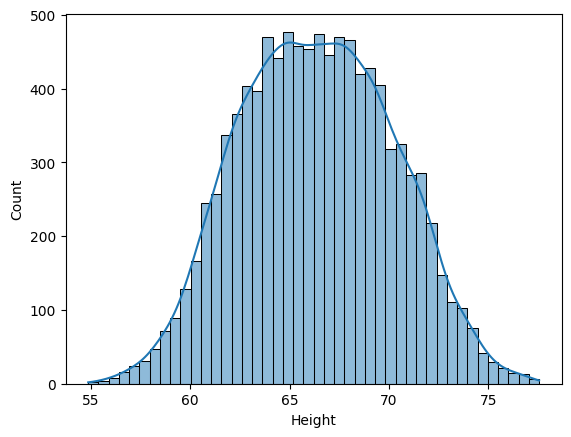

In [42]:
# lets plot the hist again
sn.histplot(ht_no_outliers.Height, kde=True)

# removing outliers using Z score
This means how many std away a datapoint is from the mean ie z score = (x-mean)/std, x==> every datapoint

In [43]:
# lets create another column for z-score
ht["Zscore"] = (ht.Height - ht.Height.mean())/ht.Height.std()
ht

,Gender,Height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [44]:
# lets filter out outliers
no_outs = ht[(ht.Zscore > -3 ) & (ht.Zscore < 3)]
no_outs

,Gender,Height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


<Axes: xlabel='Zscore', ylabel='Count'>

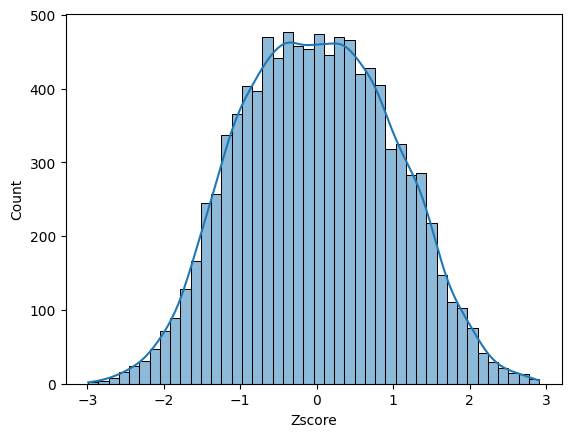

In [45]:
# lets plot the bell curve
sn.histplot(no_outs.Zscore, kde=True)

# Modified z score to detect outliers

In [46]:
# read the movies csv
movies = pd.read_csv("csv_files/statistics for ML/tmdb_5000_movies.csv")
movies.head()

,budget,genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [47]:
# we can notice that the revenue column has big values, lets convert it to milions
movies["revenue"].describe()

KeyError: 'revenue'

In [ ]:
# convert revenue to millions
# create revenue_mln column and convert revenue to millions
movies["revenue_mln"] = movies["revenue"].apply(lambda x: x/1000000)
movies["revenue_mln"].describe()

In [ ]:
# created column
movies.head(2)

In [ ]:
# Now that we have the revenue in million, lets use zscore to detect outliers
# we need std and mean to use the zscore
# lets create a turple of calculations we need
# underscore is used to store values we dont care about
_,mean, std, *_ =  movies["revenue_mln"].describe()

mean, std

In [ ]:
# create a column in the dataframe which will be the zscore
# write a function to get zscore ie how many std a datapoint is from the mean score
def get_zscore(value, mean, std):
    return (value-mean)/std

In [ ]:
# create a z_score column and call the function
movies["z_score"] = movies["revenue_mln"].apply(lambda x: get_zscore(x, mean, std))
movies.head(2)

In [ ]:
# detect outliers
movies[movies.z_score > 3]

In [ ]:
# from above, we can see that 118 row contain outliers
# the revenue is affecting the mean, so we may not be detecting all the possible outliers (higher values)
# we shall then use median absolute deviation to detect all the possible higher values
# write a function
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [ ]:
# compute MAD and median
MAD = get_mad(movies.revenue_mln)
median = np.median(movies.revenue_mln)
MAD, median